In [1]:
import datetime
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display as dsp

# United States Drug Prices: Forecasting and Analysis

## Data Collection

In [2]:
#Socrata SQL query
SODA = '$limit=150000'
URL = 'https://data.medicaid.gov/resource/444w-ftrz.csv?{}'.format(SODA)

In [3]:
raw = pd.read_csv(URL, parse_dates = True)

In [18]:
print(raw.columns)

#Strip timestamp from dates
def strip_time(date):
    return(date[:-len('T00:00:00.000')])
    #return datetime.datetime.strptime(date, '%Y-%m-%d').date()


#Print start date and end date

raw['start_date'] = raw['start_date'].apply(lambda x: strip_time(x))
dsp(raw.head())

Index(['ndc_description', 'ndc', 'old_nadac_per_unit', 'new_nadac_per_unit',
       'classification_for_rate_setting', 'percent_change', 'primary_reason',
       'start_date', 'end_date', 'effective_date'],
      dtype='object')


,ndc_description,ndc,old_nadac_per_unit,new_nadac_per_unit,classification_for_rate_setting,percent_change,primary_reason,start_date,end_date,effective_date
0,BLEPH-10 10% EYE DROPS,11980001105,4.96476,17.13978,B,245.23,WAC Adjustment,,2013-12-05T00:00:00.000,NaN
1,BLEPHAMIDE EYE DROPS,11980002205,16.68362,17.37665,B,4.15,WAC Adjustment,,2013-12-05T00:00:00.000,NaN
2,BLEPHAMIDE EYE DROPS,11980002210,12.36584,17.37265,B,40.49,WAC Adjustment,,2013-12-05T00:00:00.000,NaN
3,BLEPHAMIDE EYE OINTMENT,23031304,23.06996,24.56304,B,6.47,WAC Adjustment,,2013-12-05T00:00:00.000,NaN
4,FML FORTE 0.25% EYE DROPS,11980022805,6.61291,17.43335,B,163.63,WAC Adjustment,,2013-12-05T00:00:00.000,NaN


In [22]:
print('This dataset represents {} unique NDCs over {} entries.'.format(len(raw['ndc'].unique()), raw.shape[0]))
print('There are {} unique NDC descriptions represented in this dataset.'.format(len(raw['ndc_description'].unique())))

def list_unique_counts(df):
    for col in df.columns:
        print(col, '\n', len(df[str(col)].unique()))
    print('Total Number Observations:\n', df.shape[0])

print('\nUnique Values in Raw Data per Column:')
list_unique_counts(raw)

This dataset represents 23058 unique NDCs over 150000 entries.
There are 5722 unique NDC descriptions represented in this dataset.

Unique Values in Raw Data per Column:
ndc_description 
 5722
ndc 
 23058
old_nadac_per_unit 
 21437
new_nadac_per_unit 
 21466
classification_for_rate_setting 
 2
percent_change 
 4223
primary_reason 
 5
start_date 
 1
end_date 
 37
effective_date 
 1
Total Number Observations:
 150000


In [6]:
print('Top value counts for NDC:')
dsp(raw['ndc'].value_counts().sort_values(ascending = False).head())

print('\nTop value counts for NDC description:')
dsp(raw['ndc_description'].value_counts().sort_values(ascending = False).head())

Top value counts for NDC:


13668026805    10
93010901       10
51079038520    10
51079038501    10
51079038519    10
Name: ndc, dtype: int64


Top value counts for NDC description:


METFORMIN HCL 500 MG TABLET      558
AMLODIPINE BESYLATE 5 MG TAB     479
METFORMIN HCL 1,000 MG TABLET    475
AMLODIPINE BESYLATE 10 MG TAB    467
LISINOPRIL 20 MG TABLET          466
Name: ndc_description, dtype: int64

### Metrics for General Volatility

#### Changes per Day

In [7]:
#Changes per day
change_count = raw['start_date'].value_counts().sort_index()
dsp(change_count.head())
#print(type(change_count.index))
print('Our data represents the range of dates between {} and {}'.format(change_count.index.min(),change_count.index.max()))
#print(type(change_count))

#print(change_count.index[0])

print(type(min(change_count.index)))
print(len(change_count.index))

2013-11-28       24
2013-12-05      123
2013-12-11    18234
2013-12-18       62
2013-12-25       12
Name: start_date, dtype: int64

Our data represents the range of dates between 2013-11-28 and 2014-08-13
<class 'str'>
37


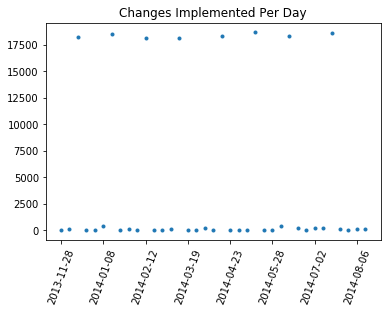

In [8]:
plt.title('Changes Implemented Per Day')
plt.plot(change_count, '.')
plt.xticks(np.arange(0,len(change_count.index), round((len(change_count.index)) / 8)), rotation = 70)
plt.show()

#### Average Rate Change per Month

In [9]:
mnth = raw[['start_date', 'old_nadac_per_unit', 'new_nadac_per_unit', 'percent_change']]

#Remove day:
mnth['start_date'] = mnth['start_date'].apply(lambda x: x[:-3])

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


In [10]:
mnth_avgs = mnth.groupby(['start_date']).mean()
mnth_avgs.head()

,old_nadac_per_unit,new_nadac_per_unit,percent_change
start_date,,,
2013-11,26.568187,34.925967,75.420417
2013-12,1.741059,1.801719,4.781268
2014-01,3.424447,3.545686,7.404165
2014-02,3.949125,4.057645,-2.624520
2014-03,2.127574,2.160392,0.555345


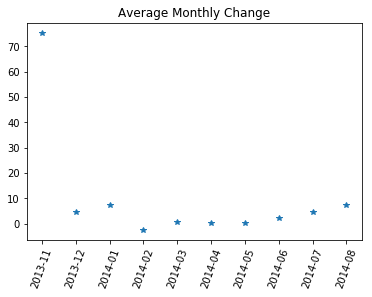

In [11]:
plt.title('Average Monthly Change')
plt.plot(mnth_avgs['percent_change'], '*')
plt.xticks(np.arange(0,len(mnth_avgs.index), round((len(mnth_avgs.index)) / 8)), rotation = 70)
plt.show()

Text(0, 0.5, 'Observations')

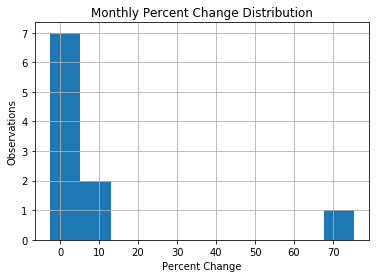

In [12]:
plt.title('Monthly Percent Change Distribution')
mnth_avgs['percent_change'].hist()
plt.xlabel('Percent Change')
plt.ylabel('Observations')

#### Total Price Gain/Loss per Month

In [15]:
mnth['total_price_change'] = mnth['new_nadac_per_unit'] - mnth['old_nadac_per_unit']
mnth_sum = mnth.groupby(['start_date']).sum()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


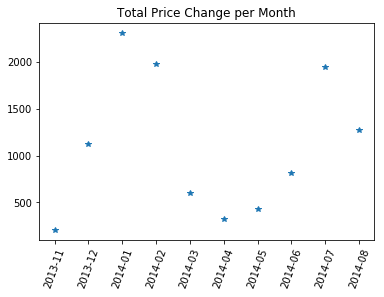

In [17]:
plt.title('Total Price Change per Month')
plt.plot(mnth_sum['total_price_change'], '*')
plt.xticks(np.arange(0,len(mnth_sum.index), round((len(mnth_sum.index)) / 8)), rotation = 70)
plt.show()

### Forecasting

#### Generic and Branded

In [26]:
print('{}% of changes are to generic medicines.'.format(round(len(raw[raw['classification_for_rate_setting'] == 'G'])
                                                              / raw.shape[0], 3) * 100))

95.6% of changes are to generic medicines.


#### Individual Drugs

__By NDC Description__

In [39]:
#Find most frequently changed ndc prices
top_25_desc = raw['ndc_description'].value_counts().sort_values(ascending = False)[:25]
#dsp(top_25_desc)

#Filter raw data for these descriptions
desc_raw_25 = raw[raw['ndc_description'].isin(top_25_desc.index)]

dsp(desc_raw_25.head())

,ndc_description,ndc,old_nadac_per_unit,new_nadac_per_unit,classification_for_rate_setting,percent_change,primary_reason,start_date,end_date,effective_date
971,AMLODIPINE BESYLATE 10 MG TAB,54010220,0.02629,0.02515,G,-4.34,Survey Rate,,2013-12-18T00:00:00.000,NaN
972,AMLODIPINE BESYLATE 10 MG TAB,54010222,0.02629,0.02515,G,-4.34,Survey Rate,,2013-12-18T00:00:00.000,NaN
973,AMLODIPINE BESYLATE 10 MG TAB,54010228,0.02629,0.02515,G,-4.34,Survey Rate,,2013-12-18T00:00:00.000,NaN
974,AMLODIPINE BESYLATE 10 MG TAB,93716898,0.02629,0.02515,G,-4.34,Survey Rate,,2013-12-18T00:00:00.000,NaN
975,AMLODIPINE BESYLATE 10 MG TAB,143996109,0.02629,0.02515,G,-4.34,Survey Rate,,2013-12-18T00:00:00.000,NaN


__BY NDC Number__

In [31]:
#Find most frequently changed ndc codes
dsp(dsp(raw['ndc'].value_counts().sort_values(ascending = False)[:10]))

13668026805    10
93010901       10
51079038520    10
51079038501    10
51079038519    10
13668026810    10
93009001       10
51079038517    10
60505018301    10
60505018305    10
Name: ndc, dtype: int64

None